# Inhibitory feedback network
## 1. Recognise a learned pattern
There are two types of inhibition: substractive and divisive. The dynamics are given by:
$$
\begin{aligned}
    \frac{d}{d t} y_j &= \sum_i (x_i - \hat{x}_i) m_{ij}, \\
    \frac{d}{d t} \log(y_j) &= \frac{\sum_i (x_i / \hat{x}_i - 1) m_{ij}}{\sum_i m_{ij}},
\end{aligned}
$$
respectively, where
$$
\hat{x}_i = \sum_j m_{ij} y_j.
$$

In [1]:
import numpy as np
from common_functions.common_funs import *
from ifn import *
# init params and objects
feature_num, item_num = 10, 3
M = np.zeros((item_num, feature_num))
for i in range(item_num):
    M[i, i : i + 2] = 1
    M[i, 2 * i : 2 * i + 2] = 1
divcat, subcat = [inhibitory_feedback_network(M, k) for k in ['div', 'sub']]
cats = [divcat, subcat]

In [2]:
epoch = 100
rate = 0.1
epsilon = 0.001
testvector = randomise_abit(M[0], 0.4)
divkey, subkey = [c.recognise(testvector, epoch, rate) for c in cats]

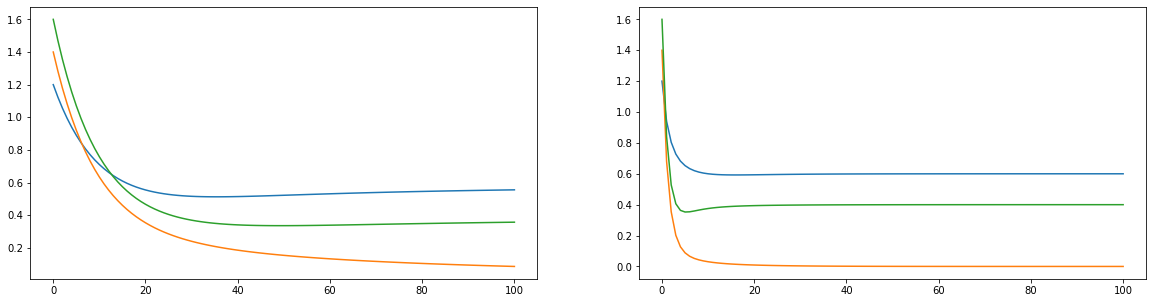

In [3]:
import matplotlib.pyplot as plt
epochs = range(epoch + 1)
fig_2met, ax_2met = plt.subplots(1, 2, figsize = (20, 5))
for ax, k in zip(ax_2met, [divkey, subkey]):
    ax.plot(epochs, k)

## 2. Coupling between X and Y through episodic key

In [4]:
# init params
x_num, y_num = 500, 100
item_num = 3
X, Y = [np.random.randint(2, size = (item_num, feat_num)) for feat_num in [x_num, y_num]]
Xifn, Yifn = [inhibitory_feedback_network(M) for M in [X, Y]]

In [5]:
epoch = 100
key, answer = [], []
for net, probe, memory in zip((Xifn, Yifn), (X[0], Y[0]), (Y, X)):
    key.append(net.recognise(probe, epoch))
    answer.append(np.dot(key, memory))

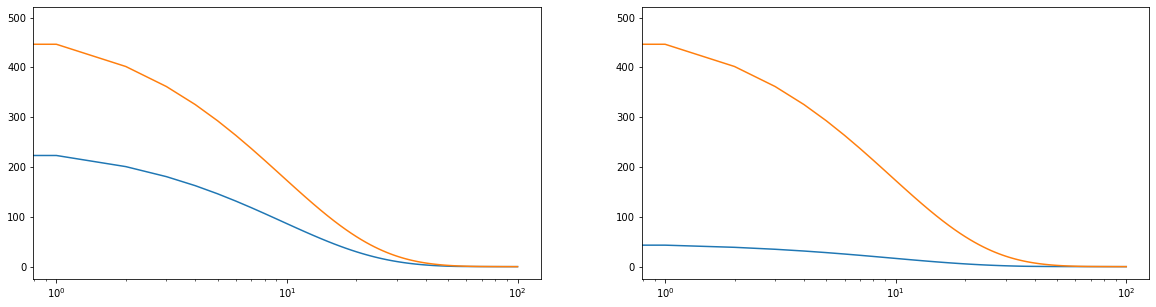

In [6]:
import matplotlib.pyplot as plt
epochs = range(epoch + 1)
fig_coup, ax_couple = plt.subplots(1, 2, figsize = (20, 5))
for ax, k, answ, probe in zip(ax_couple, key, answer, (Y[0], X[0])):
    ax.plot(epochs, np.max(np.abs(k - [1, 0, 0]), axis = 1))
    ax.plot(epochs, np.max(np.abs(answ[0] - probe), axis = 1))
    ax.set_xscale('log')